#PRACTICAL SESSION 2

**PART I LOGISTIC REGRESSION**

STEP 1: Importing the libraries

In [1]:
# Important libraries
import csv
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize
import math
from data_analysis import Data,buildmodel,PlotBoundary,testAccuracy

STEP 2: Defining a class to create usable data

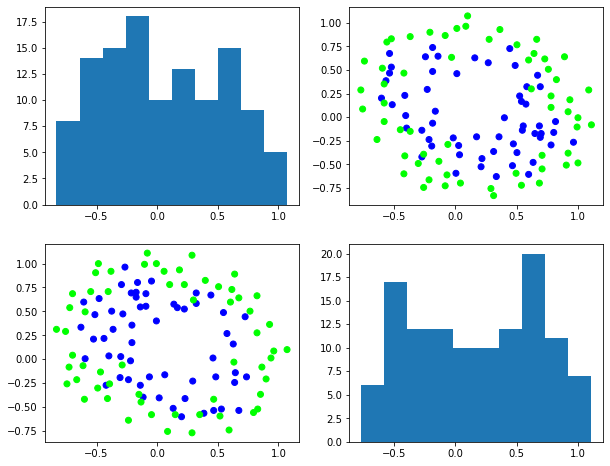

In [2]:
# Lets create the object data and plot the correlation matrix
data = Data('P2_microchip_logreg.csv')
data.splitData(0.2)
data.plotCorrelationMatrix()

STEP 3: Solving the logistic regression

In [3]:
# Define the hypothesis function between X and theta
def hypothesisFunction(X,theta):
  h = X@theta
  return h

# Define a function that applies sigmoid element-wise
def sigmoid(z):
  g = 1/(1+math.e**(-z))
  return g

# Write a function that returns a scalar with inputs: predictions "P" and targets "T", using negative loglikelihood 
def crossentroy(P,T):
  logP0 = np.where(P > 10**(-16), P, -16)
  logP1 = np.where(1-P > 10**(-16), 1-P, -16)
  L    = -np.mean(np.sum(T*np.log(logP0,out=logP0,where=logP0>0)+(1-T)*np.log(logP1,out=logP1,where=logP1>0),axis=1))
  return L

# Define the function that given the parameter lambda and theta returns the regularization term
def regularization(l,theta):
  r  = l*0.5*np.sum(theta**2)
  return r

In [4]:
# Gather all the functions above to create a function that given a set of parameters (theta, the data X, the labels Y and the value of 
# lambda), returns the cost of the negative loglikelihood and another function which returns its gradient.
# IMPORTANT we have to reshape theta at the beginning of each function as minimization functions usually ask for the parameters 
# to be gathered in a vector, BUT we want to construct the matrix to perform the simple operations
def costFunction(theta,X,Y,l):
  theta = np.reshape(theta,(X.shape[1],Y.shape[1])) 
  h = hypothesisFunction(X,theta)
  g = sigmoid(h)
  L = crossentroy(g,Y)
  R = regularization(l,theta)
  J = L + R
  return J
  
def gradient(theta,X,Y,l):
  theta = np.reshape(theta,(X.shape[1],Y.shape[1]))
  h = hypothesisFunction(X,theta)
  g = sigmoid(h)
  grad = X.T@(g-Y) + l*theta
  grad = np.reshape(grad,(X.shape[1]*Y.shape[1],1))
  return grad

d =  1 
Train accuracy:  0.5161290322580645 
Test accuracy:  0.5416666666666666
d =  2 
Train accuracy:  0.8172043010752689 
Test accuracy:  0.7916666666666666
d =  5 
Train accuracy:  0.8924731182795699 
Test accuracy:  0.7083333333333334


C:\Users\nando\AppData\Local\Temp\ipykernel_17776\3155731126.py:8: RuntimeWarning: overflow encountered in power
  g = 1/(1+math.e**(-z))
C:\Users\nando\Desktop\UPC\SummerSchoolCIMNE\Sess2\data_analysis.py:122: RuntimeWarning: overflow encountered in power
  g = 1/(1+math.e**(-z))


d =  10 
Train accuracy:  0.967741935483871 
Test accuracy:  0.75


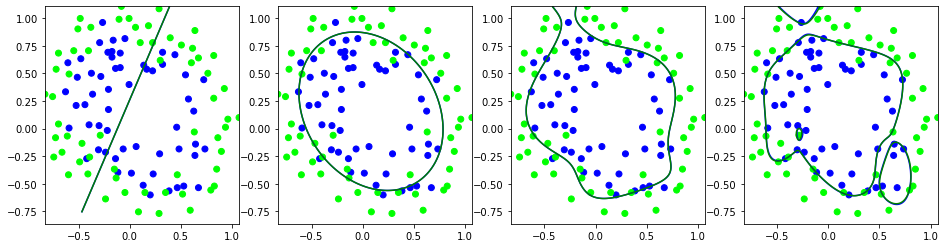

In [5]:
# We use different data augmentations to obtain the boundaries
d = np.array([1,2,5,10])
l = 0
idx = [0,1]
theta = []

for i in range(len(d)):
  theta0,Xtr,Ytr = buildmodel(data.Xtrain,data.Ytrain,d[i],idx)
  _,Xte,Yte = buildmodel(data.Xtest,data.Ytest,d[i],idx)
  sol = minimize(costFunction,theta0,args=(Xtr,Ytr,l))
  theta.append(np.reshape(sol.x,(Xtr.shape[1],Ytr.shape[1])))
  trA = testAccuracy(Xtr,Ytr,theta[-1])
  teA = testAccuracy(Xte,Yte,theta[-1])
  print('d = ',d[i],'\nTrain accuracy: ',trA,'\nTest accuracy: ',teA)
plt.figure(figsize=(16,4))
for i in range(len(d)):
  plt.subplot(1,4,i+1)
  PlotBoundary(data,theta[i],d[i],idx)


STEP 4: Applying regularization

C:\Users\nando\AppData\Local\Temp\ipykernel_17776\3155731126.py:8: RuntimeWarning: overflow encountered in power
  g = 1/(1+math.e**(-z))


l =  0.0 Train accuracy:  0.967741935483871 
Test accuracy:  0.75
l =  1e-05 Train accuracy:  0.8924731182795699 
Test accuracy:  0.75
l =  0.001 Train accuracy:  0.7956989247311828 
Test accuracy:  0.7916666666666666
l =  0.1 Train accuracy:  0.7634408602150538 
Test accuracy:  0.7916666666666666


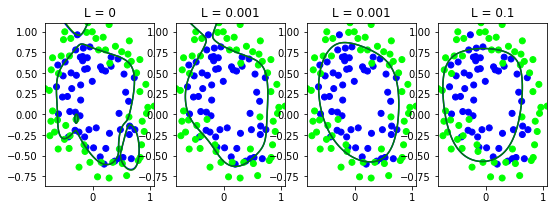

In [6]:
# We now apply regularization to d = 10 which is clearly overfitted
d = 10
l = np.array([0,0.00001,0.001,0.1])
idx = [0,1]
theta0,Xtr,Ytr = buildmodel(data.Xtrain,data.Ytrain,d,idx)
_,Xte,Yte = buildmodel(data.Xtest,data.Ytest,d,idx)
theta = []

for i in range(len(l)):
  sol = minimize(costFunction,theta0,args=(Xtr,Ytr,l[i]))
  theta.append(np.reshape(sol.x,(Xtr.shape[1],Ytr.shape[1])))
  trA = testAccuracy(Xtr,Ytr,theta[-1])
  teA = testAccuracy(Xte,Yte,theta[-1])
  print('l = ',l[i],'Train accuracy: ',trA,'\nTest accuracy: ',teA)
  
plt.figure(figsize=(9,3))
plt.subplot(1,4,1)
plt.title('L = 0')
PlotBoundary(data,theta[0],d,idx)
plt.subplot(1,4,2)
plt.title('L = 0.001')
PlotBoundary(data,theta[1],d,idx)
plt.subplot(1,4,3)
plt.title('L = 0.001')
PlotBoundary(data,theta[2],d,idx)
plt.subplot(1,4,4)
plt.title('L = 0.1')
PlotBoundary(data,theta[3],d,idx)
plt.show()


In [7]:
d = 5
idx = [0,1]
l = np.array([10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1)])
tr = np.array([0.2,0.4,0.6])
iter = 10
HIST = []
Etr = np.zeros((len(l),len(tr)))
Ete = np.zeros((len(l),len(tr)))
EtrSD = np.zeros((len(l),len(tr)))
EteSD = np.zeros((len(l),len(tr)))

for j in range(len(tr)):
  data.splitData(tr[j])
  theta0,_,_ = buildmodel(data.Xtrain,data.Ytrain,d,idx)

  for i in range(len(l)): 
    auxtr = np.zeros((iter,))
    auxte = np.zeros((iter,))
    mask = np.ones((iter,),dtype=int)
    for k in range(iter):
      data.splitData(tr[j])
      _,Xtr,Ytr = buildmodel(data.Xtrain,data.Ytrain,d,idx)
      _,Xte,Yte = buildmodel(data.Xtest,data.Ytest,d,idx)
      sol       = minimize(costFunction,theta0,args=(Xtr,Ytr,l[i]))
      thetaAUX  = np.reshape(sol.x,(Xtr.shape[1],Ytr.shape[1]))
      auxtr[k] = testAccuracy(Xtr,Ytr,thetaAUX)
      auxte[k] = testAccuracy(Xte,Yte,thetaAUX)
    Etr[i,j] = np.nanmean(auxtr)
    Ete[i,j] = np.nanmean(auxte)
    EtrSD[i,j] = np.std(auxtr)
    EteSD[i,j] = np.std(auxte)

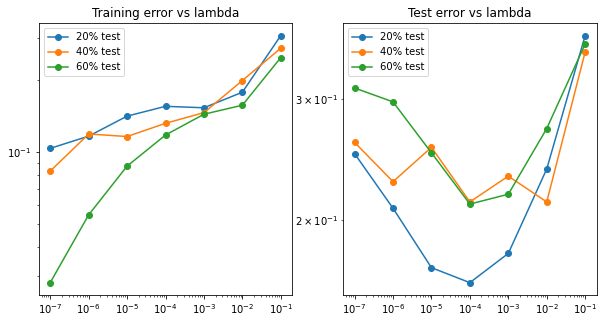

In [8]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
for j in range(len(tr)):
#  plt.errorbar(l,Etr[:,j],yerr=EtrSD[:,j],fmt='-o')
  plt.plot(l,(1-Etr[:,j]),'-o')
plt.title('Training error vs lambda')
plt.legend(['20% test','40% test','60% test'])
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = fig.add_subplot(1, 2, 2)
for j in range(len(tr)):
#  plt.errorbar(l,Ete[:,j],yerr=EteSD[:,j],fmt='-o')
  plt.plot(l,(1-Ete[:,j]),'-o')
plt.title('Test error vs lambda')
plt.legend(['20% test','40% test','60% test'])
ax2.set_xscale('log')
ax2.set_yscale('log')

plt.show()

**GRADIENT DESCENT**

STEP 5: Implementing gradient descent

In [9]:
class gradientDescent:
  
  def __init__(self,lr,maxiters,plot):
    self.lr = lr
    self.maxIters = maxiters
    self.plot = plot
    self.optHIST = []

  def train(self,F,f,X,Y,theta):
    # Here occurs the main loop of the minimization, F is a handle function of costFunction and f is a handle function
    # of gradient. Use F,f and self.step to do all the steps necessary to update the parameters
    iter = 0
    while iter < self.maxIters:
      J     = F(theta,X,Y)
      grad  = f(theta,X,Y)
      gnorm = np.linalg.norm(grad)
      theta  = self.step(theta,grad)
      self.optHIST.append([J,gnorm*self.lr])
      iter  += 1
    self.optHIST = np.array(self.optHIST)
    self.plotEnd()
    return theta

  def step(self,theta,grad):
    # Update the parameters
    theta = theta - self.lr*grad
    return theta
      
  def plotEnd(self):
    # A function that plots at the end the evolution of the function value and the step size
    if (self.plot == True):
      plt.show()
      plt.figure(1,figsize=(10,5))
      s = np.arange(0,self.maxIters,20)
      plt.subplot(1,2,1)
      plt.title('Function value vs iter')
      plt.scatter(s,self.optHIST[s,0])
      plt.subplot(1,2,2)
      plt.title('Step size vs iter')
      plt.scatter(s,self.optHIST[s,1])
      plt.show()

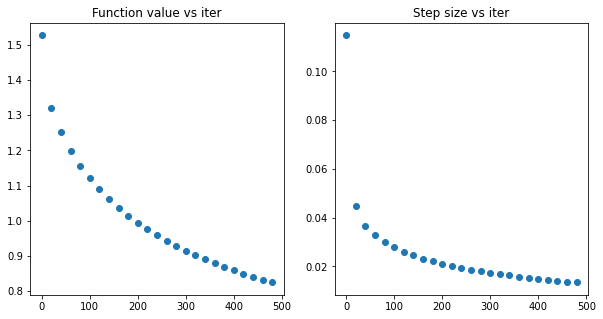

Train accuracy:  0.8260869565217391 
Test accuracy:  0.7183098591549296


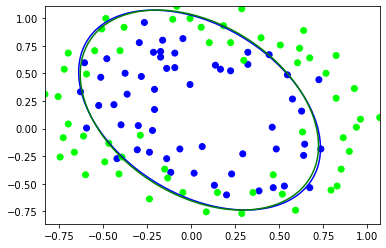

In [10]:
d = 2
l = 0.0
idx = [0,1]
theta0,Xtr,Ytr = buildmodel(data.Xtrain,data.Ytrain,d,idx)
F = lambda theta,X,Y: costFunction(theta,X,Y,l)
f = lambda theta,X,Y: gradient(theta,X,Y,l)
gd = gradientDescent(lr=0.01,maxiters=500,plot=True)
sol = gd.train(F,f,Xtr,Ytr,theta0)
theta = np.reshape(sol,[Xtr.shape[1],Ytr.shape[1]])
PlotBoundary(data,theta,d,idx)

_,Xte,Yte = buildmodel(data.Xtest,data.Ytest,d,idx)
tr        = testAccuracy(Xtr,Ytr,theta)
te        = testAccuracy(Xte,Yte,theta)
print('Train accuracy: ',tr,'\nTest accuracy: ',te)

STEP 6: Analyzing the learning rate

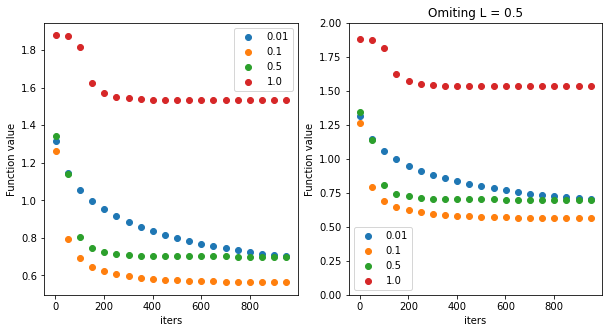

In [11]:
d = 2
l = 0.0
idx = [0,1]
lr = np.array([0.01, 0.1, 0.5, 1])
iter = 10
theta0,Xtr,Ytr = buildmodel(data.Xtrain,data.Ytrain,d,idx)
F = lambda theta,X,Y: costFunction(theta,X,Y,l)
f = lambda theta,X,Y: gradient(theta,X,Y,l)
plotLR = []

for i in range(len(lr)):
  gd = gradientDescent(lr=lr[i],maxiters=1000, plot=False)
  sol = gd.train(F,f,Xtr,Ytr,theta0)
  plotLR.append(gd.optHIST[:,0])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('iters')
plt.ylabel('Function value')
s = np.arange(1,1000,50)
leg = []
for i in range(len(lr)):
  plt.scatter(s,plotLR[i][s])
  leg.append(str(lr[i]))
plt.legend(leg)

plt.subplot(1,2,2)
plt.title('Omiting L = 0.5')
plt.xlabel('iters')
plt.ylabel('Function value')
leg = []
for i in range(len(lr)):
  plt.scatter(s,plotLR[i][s])
  leg.append(str(lr[i]))
plt.ylim([0,2])
plt.legend(leg)
plt.show()

STEP 7: Implementing stochastic gradient descent

In [20]:
# We can create a class stochastic gradient descent which inherits from gradient descent
# We overwrite the loop (notice the only change is another loop inside iterating through the bath)
# We create a method create minibatch wich will create the batches at each iteration
class SGD(gradientDescent):
  def __init__(self,lr,maxepochs,batch,plot):
    gradientDescent.__init__(self,lr,maxepochs,plot)
    self.batchSz = batch

  def train(self,F,f,X,Y,theta,outFCN):
    # Here occurs the main loop of the minimization
    epoch = 0
    iter  = 0
    nB    = X.shape[0]//self.batchSz
    while epoch < self.maxIters:
      if (nB == 1 or nB == 0):
        order = np.arange(X.shape[0])
        nB = 1;
      else:
        order = np.random.permutation(X.shape[0])
      for i in range(nB):
        Xb,Yb = self.createMinibatch(X,Y,order,i)
        J     = F(theta,Xb,Yb)
        grad  = f(theta,Xb,Yb)
        gnorm = np.linalg.norm(grad)
        theta  = self.step(theta,grad)
        iter = iter + 1
      self.optHIST.append([J,gnorm*self.lr])
      epoch  += 1
    self.optHIST = np.array(self.optHIST)
    self.plotEnd()
    return theta

  def createMinibatch(self,X,Y,order,i):
    # Function that creates the minibatch
    cont = 0
    bs = self.batchSz
    if (i == X.shape[0]//bs-1):
      plus = X.shape[0]%bs
    else:
      plus = 0
    Xb = X[order[i*bs:(i+1)*bs+plus],:]
    Yb = Y[order[i*bs:(i+1)*bs+plus],:]
    return Xb,Yb

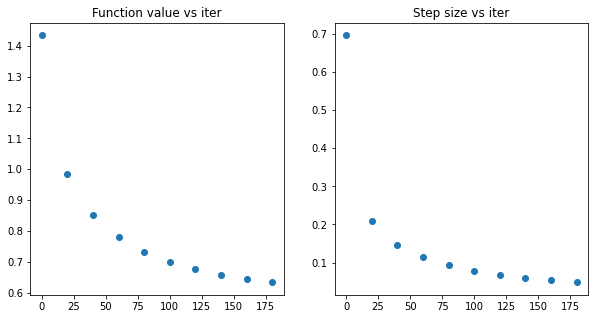

Train accuracy:  0.8913043478260869 
Test accuracy:  0.7887323943661971


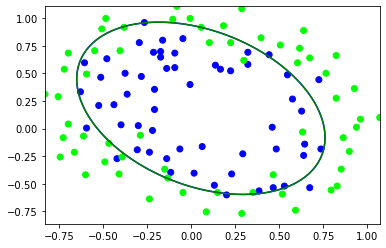

In [22]:
# We test our new minimizer
d = 2
l = 0.0
idx = [0,1]
m = data.Xtrain.shape[0]
theta0,Xtr,Ytr = buildmodel(data.Xtrain,data.Ytrain,d,idx)
F = lambda theta,X,Y: costFunction(theta,X,Y,l)
f = lambda theta,X,Y: gradient(theta,X,Y,l)
sgd = SGD(lr=0.1,maxepochs=200,batch=m,plot=True)
sol = sgd.train(F,f,Xtr,Ytr,theta0,outFCN)
theta = np.reshape(sol,[Xtr.shape[1],Ytr.shape[1]])

PlotBoundary(data,theta,d,idx)
_,Xte,Yte = buildmodel(data.Xtest,data.Ytest,d,idx)
tr        = testAccuracy(Xtr,Ytr,theta)
te        = testAccuracy(Xte,Yte,theta)
print('Train accuracy: ',tr,'\nTest accuracy: ',te)